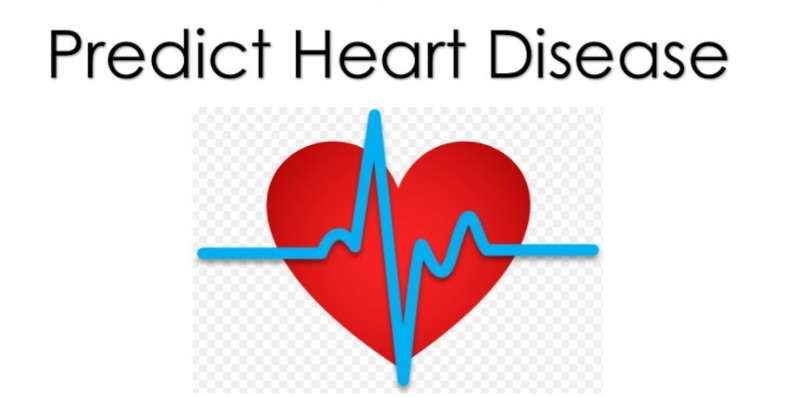


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing the necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

Attribute Information
Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df[df.duplicated()]

There are no duplicated values in the dataset

In [ ]:
df['HeartDisease'].value_counts()

The HeartDisease distribution is shown above. This means our data is standard and there are less chances of biasing

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot('Age','HeartDisease',data = df)
plt.show()

## The above bar chart tells us regarding the possibility of heart disease for individual ages. It is clear that people above 50 are highly prone to heart diseases

In [ ]:
plt.figure(figsize = (8,6))
plots = sns.countplot('Sex',data = df)


for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

## In our dataset the male distribution is high compared to female distribution

In [ ]:
# Age distribution

sns.histplot(x = 'Age', data=df)

## The below chart is interactive

In [ ]:
fig1 = px.scatter(df, x ='Age', y='RestingBP')
fig1

## The above chart shows us the resting BP of each person with respect to age. As age increases BP also increases

In [ ]:
plt.figure(figsize=(15,5))
sns.regplot( x ='Age', y='RestingBP', data =df,color ='r')


## The regression line shows there is an increase 

In [ ]:
fig2 = px.scatter(df, x ='Age', y='RestingBP', color = 'RestingECG')
fig2

## In the above graph we can see a lot of ST and LVH, ECG readings in patients who are above 50. 

In [ ]:
fig3 = px.sunburst(df,path=['Sex','ChestPainType', 'HeartDisease'], title = 'Chest pain type')
fig3

In [ ]:
fig3 = px.sunburst(df,path=['Sex','ChestPainType','RestingECG'], color ='HeartDisease', title ='ChestPainType with RestingECG')
fig3

In [ ]:
sns.catplot(x='ChestPainType', y='RestingBP', data =df)

In [ ]:
sns.catplot(x='ChestPainType', y='RestingBP',kind = 'swarm', hue= 'Sex' ,data =df)

In [ ]:

sns.catplot(x='ChestPainType', y='RestingBP',kind = 'box', hue= 'HeartDisease' ,data =df, height=5,aspect = 2)
plt.show()

## There are some exceptional cases in heart diseases

In [ ]:

sns.catplot(x='ChestPainType', y='RestingBP',kind = 'box',row = 'Sex', hue= 'HeartDisease' ,data =df)
plt.show()

In [ ]:
sns.catplot(x ='Sex', y='HeartDisease',kind = 'bar', hue ='ST_Slope', data = df)

# Classification models

In [ ]:
le = LabelEncoder()

df['chestpain'] = le.fit_transform(df['ChestPainType'])
df['ecg'] = le.fit_transform(df['RestingECG'])
df['slope'] = le.fit_transform(df['ST_Slope'])
df['angina'] = le.fit_transform(df['ExerciseAngina'])
df['sex'] = le.fit_transform(df['Sex'])



In [ ]:
df

In [ ]:
df.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope','Sex'],inplace = True, axis = 1)

In [ ]:
df

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

## There is a high correlation between variables and the target

In [ ]:
x = df.drop(['HeartDisease'],axis = 1)
y = df['HeartDisease']

In [ ]:
x

In [ ]:
y

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

# Now we have to standardize it

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Different algorithms is tried. The results are compared and the best algorithm is choosen

In [ ]:
#Logistic report

from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train) 

y_pred1 = model1.predict(x_test) 
print(classification_report(y_test, y_pred1)) 

In [ ]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test) 
print(classification_report(y_test, y_pred2))


In [ ]:
#SVC

from sklearn.svm import SVC

model3 = SVC(random_state=1) 
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3)) 

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(x_train, y_train) 
y_pred4 = model4.predict(x_test) 
print(classification_report(y_test, y_pred4))

In [ ]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) 
model5.fit(x_train, y_train) 

y_pred5 = model5.predict(x_test) 
print(classification_report(y_test, y_pred5))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train) 

y_pred = model.predict(x_test) 
print(classification_report(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

## SVC and Logistic regression model shows high accuracy ( in terms of fl score and recall) There for those two models are shortlisted. But still, we select SVC because the accuracy is a bit higher (on the basis of Confusion matrix). Therefore, we choose SVC as our final model. 


# *Future work:*

### The model can be hyper parameterized with algorithms and thus accuracy will increase considerabely. In addition to that we can also add more data to check the reliability of the model